In [1]:
%load_ext autoreload
%autoreload 2

import functions_master as fm
import pandas as pd
import numpy as np
import scipy.stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import statistics
import datetime as dt

In [2]:
metric = 'Close'

start_date = '2019-01-01'
end_date =  '2021-12-31'

raw_data = pd.read_csv("data/export.csv", parse_dates=True)
returns = fm.get_returns(raw_data)

In [3]:
key_stats = (fm.get_stats (returns, metric, start_date, end_date)
             [['CompanyName', 'PeriodStart', 'PeriodEnd', 'MonthsInPeriod', 'Volatility', 'Semideviation', 'AnnualizedVolatility', 'ReturnPerMonth', 'AnnualizedReturn']]
             .sort_values(by=['MonthsInPeriod', 'ReturnPerMonth', 'AnnualizedReturn'], ascending=False))
key_stats

,CompanyName,PeriodStart,PeriodEnd,MonthsInPeriod,Volatility,Semideviation,AnnualizedVolatility,ReturnPerMonth,AnnualizedReturn
CompanyId,,,,,,,,,
UFO.XLON,ALIEN METALS LIMITED COM SHS NPV (DI),2019-01,2021-12,36,0.104,0.051,0.36,0.046,0.715
INS.XLON,INSTEM PLC ORD 10P,2019-01,2021-12,36,0.021,0.016,0.073,0.039,0.583
GAW.XLON,GAMES WORKSHOP GROUP PLC ORD 5P,2019-01,2021-12,36,0.026,0.017,0.09,0.034,0.494
DSCV.XLON,DISCOVERIE GROUP PLC ORD 5P,2019-01,2021-12,36,0.027,0.015,0.094,0.029,0.409
RENE.XLON,RENEURON GROUP PLC ORD 1P,2019-01,2021-12,36,0.053,0.029,0.184,0.014,0.182
CHRT.XLON,COHORT PLC ORD 10P,2019-01,2021-12,36,0.02,0.016,0.069,0.01,0.127
MMX.XLON,MINDS + MACHINES GROUP LIMITED ORD NPV (DI),2019-01,2021-12,36,0.035,0.022,0.121,0.008,0.1
JEMI.XLON,JPMORGAN GLOBAL EMERGING MARKETS INCOME TRUST ...,2019-01,2021-12,36,0.017,0.013,0.059,0.005,0.062
GHH.XLON,GOOCH & HOUSEGO PLC ORD 20P,2019-01,2021-12,36,0.028,0.023,0.097,0.001,0.012


<AxesSubplot:xlabel='Date'>

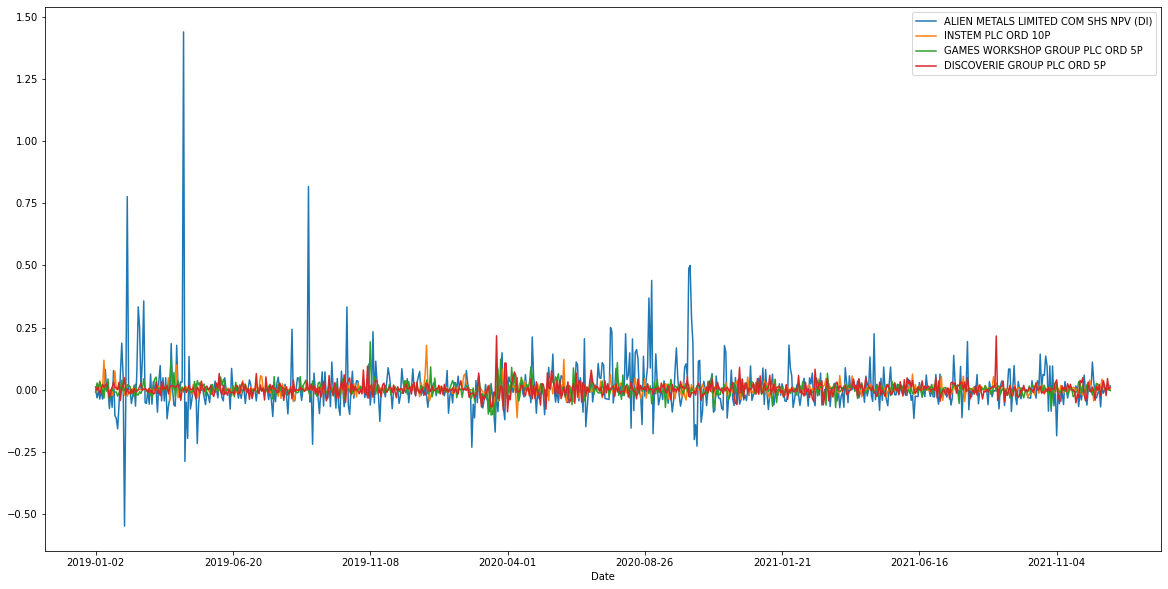

In [10]:
companies = ['UFO.XLON', 'INS.XLON', 'GAW.XLON', 'DSCV.XLON']

returns_multiple = fm.compare_returns (companies, raw_data, metric, start_date, end_date)
returns_multiple.plot(figsize=(20, 10))

In [11]:
cov_matrix = returns_multiple.cov()
annualized_rets = key_stats[key_stats.index.isin(companies)]['AnnualizedReturn']

<AxesSubplot:xlabel='Volatility'>

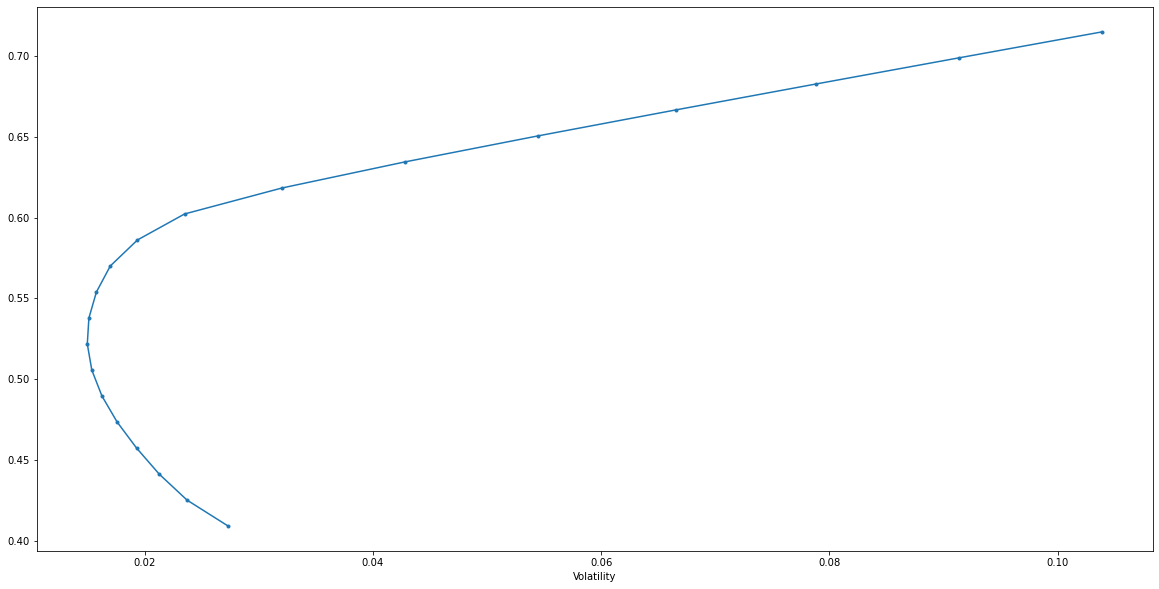

In [12]:
fm.plot_ef(20, annualized_rets, cov_matrix)

In [13]:
df = fm.get_portfolio_details(20, annualized_rets, cov_matrix)
df_weights = pd.DataFrame(df['Weights'].to_list(), columns = [companies])
df = pd.concat([df, df_weights], axis=1) 
df = df.drop('Weights', axis=1)
df = df.round(decimals = 3)
df.columns = ['Returns', 'Volatility'] + returns_multiple.columns.tolist()
df

,Returns,Volatility,ALIEN METALS LIMITED COM SHS NPV (DI),INSTEM PLC ORD 10P,GAMES WORKSHOP GROUP PLC ORD 5P,DISCOVERIE GROUP PLC ORD 5P
0,0.409,0.027,0.000,0.000,0.000,1.000
1,0.425,0.024,0.000,0.000,0.189,0.811
2,0.441,0.021,0.000,0.036,0.305,0.659
3,0.457,0.019,0.000,0.130,0.303,0.567
4,0.473,0.018,0.000,0.224,0.300,0.476
5,0.490,0.016,0.000,0.317,0.299,0.384
6,0.506,0.015,0.009,0.397,0.292,0.302
7,0.522,0.015,0.015,0.480,0.288,0.216
8,0.538,0.015,0.024,0.561,0.283,0.133
9,0.554,0.016,0.031,0.642,0.279,0.048


In [14]:
df = df[df['Volatility'] == min(df['Volatility'])]
df = df[df['Returns'] == max(df['Returns'])]
df

,Returns,Volatility,ALIEN METALS LIMITED COM SHS NPV (DI),INSTEM PLC ORD 10P,GAMES WORKSHOP GROUP PLC ORD 5P,DISCOVERIE GROUP PLC ORD 5P
8,0.538,0.015,0.024,0.561,0.283,0.133


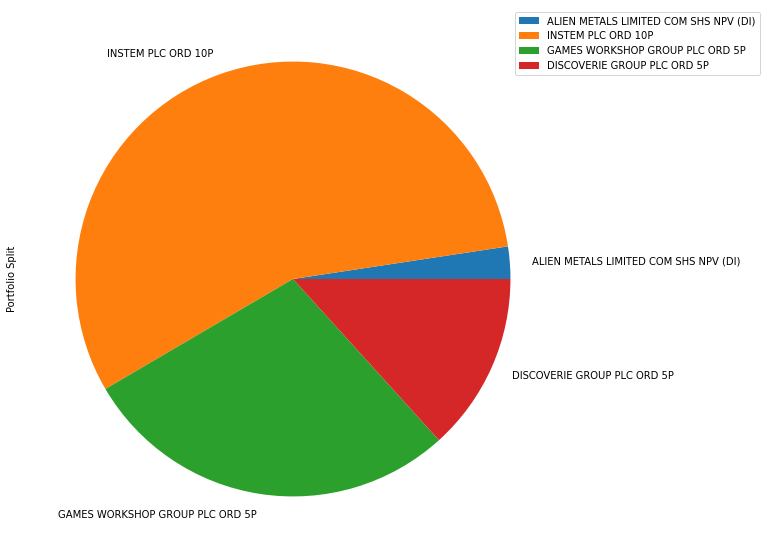

In [17]:
split = df[returns_multiple.columns.tolist()].T
split.columns = ['Portfolio Split']
split.plot.pie(y='Portfolio Split', figsize=(10, 10)).legend(bbox_to_anchor=(0.9, 1))